# ResNet으로 ImageNet 분류

## 분류 실행

앞의 predict_vgg16()과 전체 구조는 완벽히 동일하다.

비교를 위해 커멘트를 전부 삭제하였고, 다른 부분만 커멘트를 달았다.

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications import resnet50
from IPython.display import display
import numpy as np


def predict_resnet50(model, filename) :

  image = load_img(filename)
  display(image)
  
  image = load_img(filename, target_size=(224, 224))

  image = img_to_array(image)

  image = image.reshape((1, 224, 224, 3))

  image = resnet50.preprocess_input(image)
  
  
  yhat = model.predict(image)
    
    
#  label = vgg16.decode_predictions(yhat)
  label = resnet50.decode_predictions(yhat)

  label = label[0][0]
  
  print('%s (%.2f%%)' % (label[1], label[2]*100))
  

  


Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

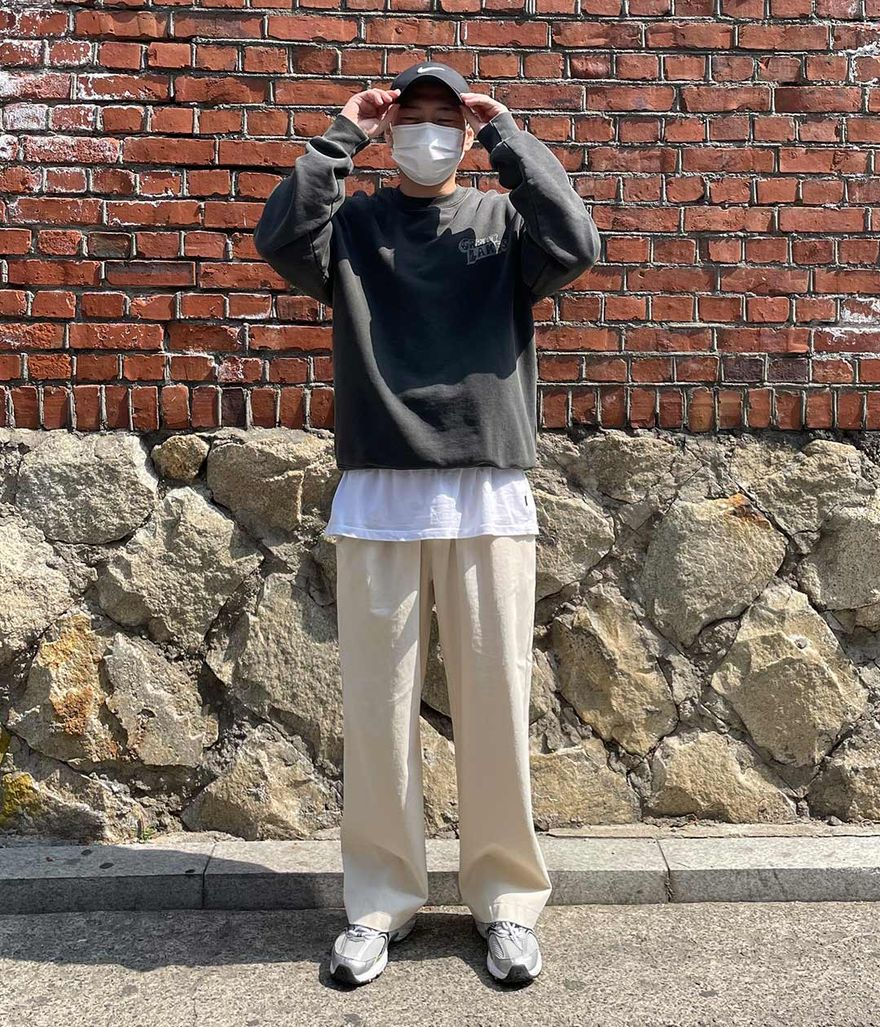

1/1 [==============================] - 1s 1s/step
binoculars (75.95%)


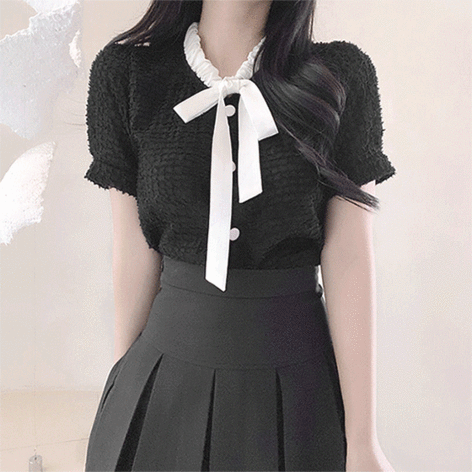

1/1 [==============================] - 0s 117ms/step
stole (50.85%)


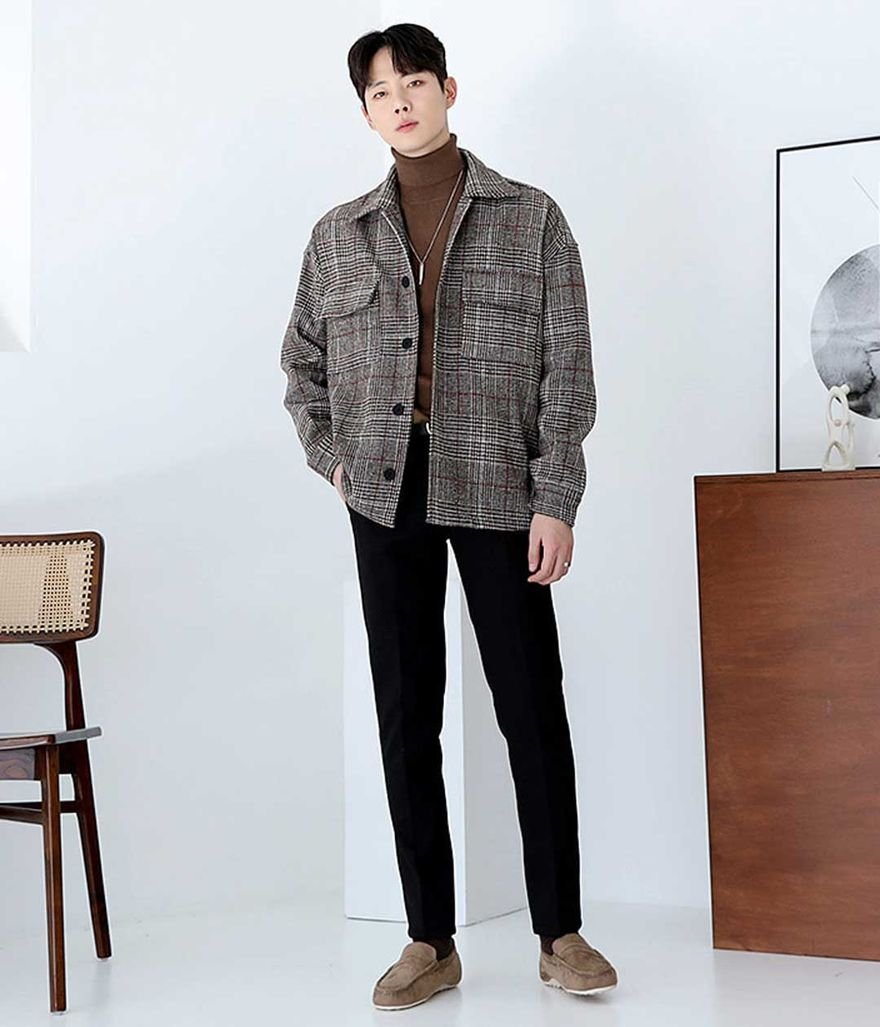

1/1 [==============================] - 0s 117ms/step
suit (35.42%)


In [3]:
from tensorflow.keras.applications import resnet50

# RestNet50 모델 불러오기
model = resnet50.ResNet50()

model.summary()

files = [
    'C://Users/KOSA/Desktop/THEFINAL/RecommendAI/Recommend/test/Daily/Daily0.jpg',
    'C://Users/KOSA/Desktop/THEFINAL/RecommendAI/Recommend/test/Lovely/Lovely0.jpg',
    'C://Users/KOSA/Desktop/THEFINAL/RecommendAI/Recommend/test/Formal/Formal0.jpg'
        ]

for file in files :
#  predict_vgg16(model, file)  
    predict_resnet50(model, file)    

# 커스텀 데이터로 학습



## 데이터 증강

Keras에서 제공하는 ImageDataGenerator를 사용

### 데이터 증강 X

In [4]:
from keras.preprocessing.image import ImageDataGenerator

train_dir = 'C://Users/KOSA/Desktop/THEFINAL/RecommendAI/Recommend/train'
validation_dir = 'C://Users/KOSA/Desktop/THEFINAL/RecommendAI/Recommend/test'
batch_size = 32
image_size = 224

# 학습에 사용될 이미지 데이터 생성기
train_datagen = ImageDataGenerator()

# 검증에 사용될 이미지 데이터 생성기
validation_datagen = ImageDataGenerator()


# 학습에 사용될 데이터 생성기  
train_generator = train_datagen.flow_from_directory(
        train_dir)

# 검증에 사용될 데이터 생성기
validation_generator = validation_datagen.flow_from_directory(
        validation_dir)

class_num=len(train_generator.class_indices)

custom_labels = list(validation_generator.class_indices.keys())

Found 2421 images belonging to 3 classes.
Found 1157 images belonging to 3 classes.


### V 데이터 증강 (기본)

In [18]:
from keras.preprocessing.image import ImageDataGenerator

train_dir = 'C://Users/KOSA/Desktop/THEFINAL/RecommendAI/StyleDataset/train'
validation_dir = 'C://Users/KOSA/Desktop/THEFINAL/RecommendAI/StyleDataset/test'
batch_size = 32
image_size = 224

# 학습에 사용될 이미지 데이터 생성기
train_datagen = ImageDataGenerator(
      rotation_range=180, # 회전 최대 20도
      width_shift_range=0.2, # 좌우 이동
      height_shift_range=0.2, # 상하 이동
      horizontal_flip=True, # 좌우 반전
      vertical_flip=True, # 상하 반전
      )
 
# 검증에 사용될 이미지 데이터 생성기
validation_datagen = ImageDataGenerator()
 

# 학습에 사용될 데이터 생성기  
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(image_size, image_size),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True)

# 검증에 사용될 데이터 생성기
validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(image_size, image_size),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

class_num=len(train_generator.class_indices)

custom_labels = list(validation_generator.class_indices.keys())

Found 4980 images belonging to 6 classes.
Found 2244 images belonging to 6 classes.


## 모델 새로 정의

In [19]:
from  tensorflow.keras.preprocessing.image import ImageDataGenerator
from  tensorflow.keras import optimizers
from  tensorflow.keras.models import Sequential
from  tensorflow.keras.layers import Dropout, Flatten, Dense
from  tensorflow.keras.models import Model
from  tensorflow.keras import models
from  tensorflow.keras import layers
from  tensorflow.keras import optimizers
import  tensorflow.keras.backend as K

K.clear_session()


#from keras.applications import vgg16
from tensorflow.keras.applications import resnet50

#conv_layers = vgg16.VGG16(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))
conv_layers = resnet50.ResNet50(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))
conv_layers.summary()

for layer in conv_layers.layers:
    layer.trainable = False


model = models.Sequential()

model.add(conv_layers)

model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(class_num, activation='softmax'))

model.summary()


# vgg16_model_path = 'new_trained_from_vgg16.h5'
resnet50_model_path = 'C://Users/KOSA/Desktop/THEFINAL/RecommendAI/PerfumeRecommend/Model/5style_resnet50_100epoch.h5'

# model.save(vgg16_model_path)
model.save(resnet50_model_path)

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

## 모델 학습

In [20]:
from  tensorflow.keras.models import load_model

#model = load_model(vgg16_model_path)
model = load_model(resnet50_model_path, compile=False)


model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])


history = model.fit(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size ,
      epochs=100,   # 원래 100
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=1)
 

#model.save(vgg16_model_path)
model.save(resnet50_model_path)

Epoch 1/100
155/155 [==============================] - 500s 3s/step - loss: 4.2589 - acc: 0.2311 - val_loss: 1.7821 - val_acc: 0.2669
Epoch 2/100
155/155 [==============================] - 491s 3s/step - loss: 1.8187 - acc: 0.2578 - val_loss: 1.9329 - val_acc: 0.2250
Epoch 3/100
155/155 [==============================] - 497s 3s/step - loss: 1.7841 - acc: 0.2753 - val_loss: 1.7271 - val_acc: 0.2834
Epoch 4/100
155/155 [==============================] - 501s 3s/step - loss: 1.7723 - acc: 0.2882 - val_loss: 1.8273 - val_acc: 0.2745
Epoch 5/100
155/155 [==============================] - 514s 3s/step - loss: 1.7430 - acc: 0.2980 - val_loss: 1.7668 - val_acc: 0.3231
Epoch 6/100
155/155 [==============================] - 547s 4s/step - loss: 1.7264 - acc: 0.3177 - val_loss: 1.7970 - val_acc: 0.3106
Epoch 7/100
155/155 [==============================] - 542s 3s/step - loss: 1.7085 - acc: 0.3223 - val_loss: 1.9343 - val_acc: 0.3026
Epoch 8/100
155/155 [==============================] - 517s 3s

## 학습 중의 로스와 정확도 보기


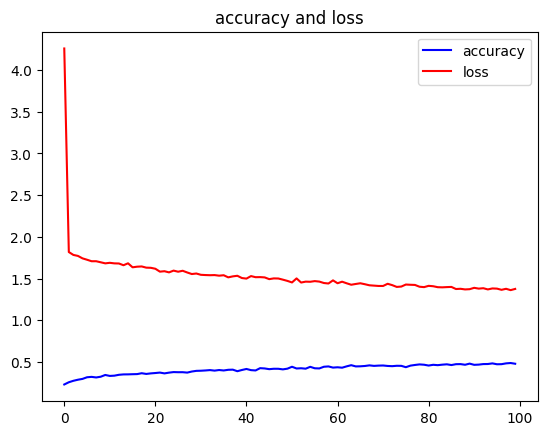

In [21]:
import matplotlib.pyplot as plt

acc = history.history['acc']
loss = history.history['loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='accuracy')
plt.plot(epochs, loss, 'r', label='loss')
plt.title('accuracy and loss')
plt.legend()
  
plt.show()

## 새로 학습된 모델로 분류 실행

학습된 모델 파일을 읽어서 분류를 실행한다.


In [1]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
#from keras.applications import vgg16
from tensorflow.keras.applications import resnet50
from IPython.display import display
import numpy as np

resnet50_model_path = 'C://Users/KOSA/Desktop/THEFINAL/RecommendAI/PerfumeRecommend/Model/5style_resnet50_100epoch.h5'
model = load_model(resnet50_model_path, compile=False)

def predict_custom_resnet50(model, filename) :

    image = load_img(filename)
    display(image)
    
    image = load_img(filename, target_size=(224, 224))

    image = img_to_array(image)
    image = image.reshape((1, 224, 224, 3))
    
    image = resnet50.preprocess_input(image)
    
    
    yhat = model.predict(image)
      

    # 최대 출력 인덱스를 구한다.
    idx=np.argmax(yhat[0])

    # 커스텀 레이블을 출력한다.
    for i in enumerate(yhat[0]):
        # print(i)
        print('%s (%.2f%%)' % (custom_labels[i[0]], i[1]*100))
    
    print('>> %s (%.2f%%)' % (custom_labels[idx], yhat[0][idx]*100))   
    


NameError: name 'load_model' is not defined

In [23]:
from keras.models import load_model

model = load_model(resnet50_model_path)
  
files = [
    'C://Users/KOSA/Desktop/THEFINAL/RecommendAI/Recommend/test/Chic/Chic1.jpg',
    'C://Users/KOSA/Desktop/THEFINAL/RecommendAI/Recommend/test/Daily/Daily1.jpg',
    'C://Users/KOSA/Desktop/THEFINAL/RecommendAI/Recommend/test/Elegant/Elegant1.jpg',
    'C://Users/KOSA/Desktop/THEFINAL/RecommendAI/Recommend/test/Formal/Formal3.jpg',
    'C://Users/KOSA/Desktop/THEFINAL/RecommendAI/Recommend/test/Lovely/Lovely3.jpg',
    'C://Users/KOSA/Desktop/THEFINAL/RecommendAI/Recommend/test/Modern/Modern3.jpg',
    ]
    


  
for file in files :
  predict_custom_resnet50(model, file)     
  

FileNotFoundError: [Errno 2] No such file or directory: 'C://Users/KOSA/Desktop/THEFINAL/RecommendAI/Recommend/test/Chic/Chic1.jpg'